# Geospatial Data Science - EEPS 440/460

# Lecture 9

# Bayesian Statistics

---
# Univariate Gaussian Distribution

### Probability Density Function

The probability density function (PDF) of a univariate Gaussian (normal) distribution is given by:

$$
f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

where:
- $\mu$ is the mean (expected value) of the distribution,
- $\sigma^2$ is the variance, which describes the spread of the distribution.

The Gaussian distribution is widely used due to its central role in statistics, particularly in the Central Limit Theorem, which states that the sum of many independent random variables tends to follow a normal distribution.

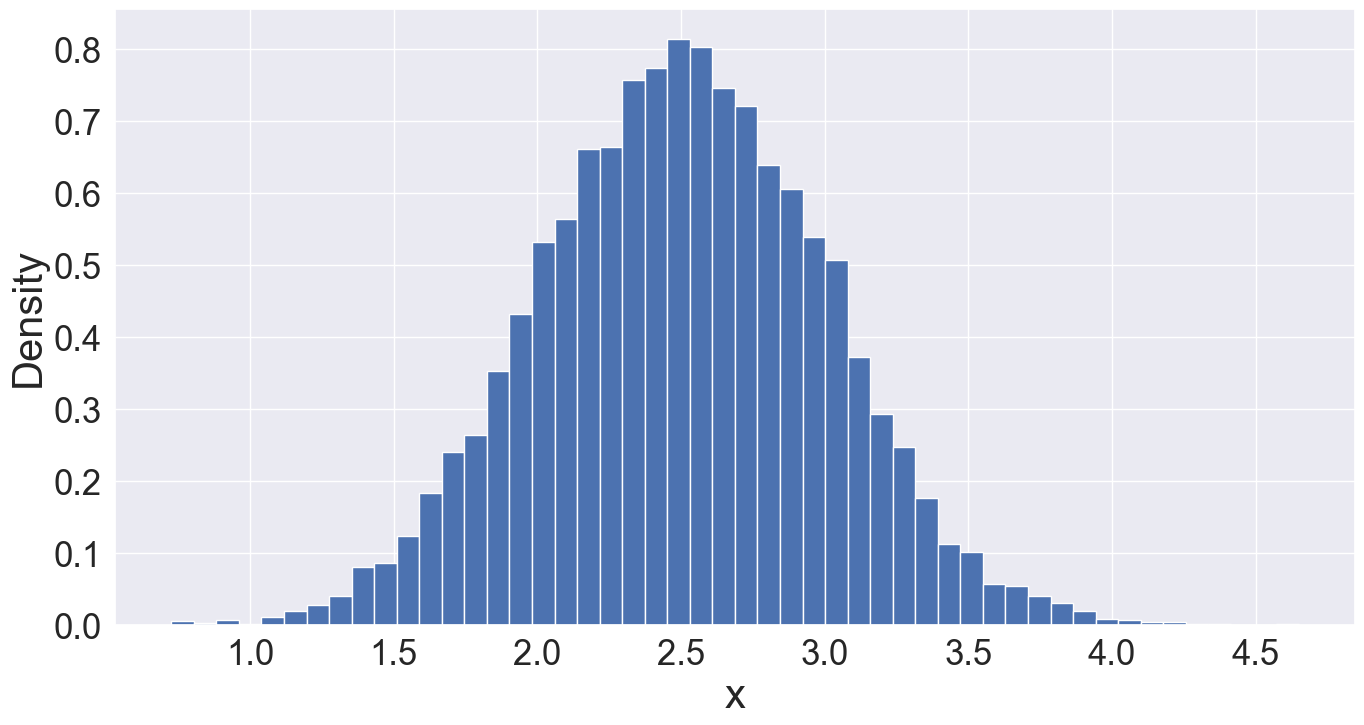

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
mu = 2.5 #mean
var = 0.5 #variance
X = np.random.normal(mu,var,10000)
plt.figure(figsize=(16,8))
plt.hist(X,bins=50,density=True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('x',fontsize=30)
plt.ylabel('Density',fontsize=30)
plt.show()

# Bivariate Gaussian Distribution

### Probability Density Function

The probability density function for a bivariate Gaussian distribution is:

$$
f_{X,Y}(x, y) = \frac{1}{2\pi\sqrt{\sigma_X^2\sigma_Y^2(1-\rho^2)}} \exp\left(-\frac{1}{2(1-\rho^2)}
\left[
\frac{(x-\mu_X)^2}{\sigma^2_X} + \frac{(y-\mu_Y)^2}{\sigma^2_Y} - \frac{2\rho(x-\mu_X)(y-\mu_Y)}{\sigma_X\sigma_Y}
\right]
\right)
$$

where:
- $\mu_X$, $\mu_Y$ are the means of $X$ and $Y$,
- $\sigma^2_X$, $\sigma^2_Y$ are their variances,
- $\rho$ is the Pearson correlation coefficient between $X$ and $Y$.

To represent this in a compact matrix form:

1. Define the random variable vector:

   $$
   \mathbf{x} =
   \begin{bmatrix}
   x \\
   y
   \end{bmatrix}
   $$

2. Define the mean vector:

   $$
   \mathbf{\mu} =
   \begin{bmatrix}
   \mu_X \\
   \mu_Y
   \end{bmatrix}
   $$

3. Define the covariance matrix:

   $$
   \mathbf{\Sigma} =
   \begin{bmatrix}
   \sigma^2_X & \text{cov}(X,Y) \\
   \text{cov}(Y,X) & \sigma^2_Y
   \end{bmatrix}
   $$

With this notation, the bivariate Gaussian density function simplifies to:

$$
f(X,Y) = \frac{\exp\left(-\frac{1}{2} (\mathbf{x} - \mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
{\sqrt{(2\pi)^2 |\mathbf{\Sigma}|}}
$$

where $|\mathbf{\Sigma}|$ is the determinant of the covariance matrix.

This formulation generalizes to higher dimensions, forming the **Multivariate Gaussian Distribution**.


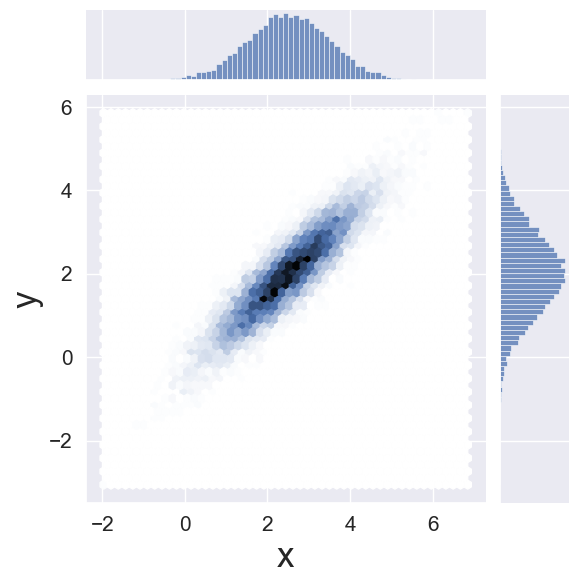

In [ ]:
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')
sns.set(rc={'axes.labelsize':25,
            'figure.figsize':(15.0, 15.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})
mu = np.array([3.0,2.0])
cov = np.array([[1.0,0.9],[0.9,1.0]])
X = np.random.multivariate_normal(mu, cov, 10000)
df = pd.DataFrame(data={'x':X[:,0],'y':X[:,1]})
sns.jointplot(x='x', y='y',data=df,kind='hex')
plt.show()

# Multivariate Gaussian Distribution

Extending from the bivariate case, the probability density function for an $n$-dimensional Gaussian distribution is:

$$
f(\mathbf{x}) = \frac{\exp\left(-\frac{1}{2} (\mathbf{x} - \mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
{\sqrt{(2\pi)^{n} |\mathbf{\Sigma}|}}
$$

where:
- $\mathbf{x}$ is an $n$-dimensional random variable vector,
- $\mathbf{\mu}$ is the mean vector of the same dimension,
- $\mathbf{\Sigma}$ is the covariance matrix (an $n \times n$ symmetric positive-definite matrix),
- $|\mathbf{\Sigma}|$ is the determinant of $\mathbf{\Sigma}$.

The multivariate Gaussian distribution is crucial in statistics and machine learning, as it describes relationships between multiple correlated variables.


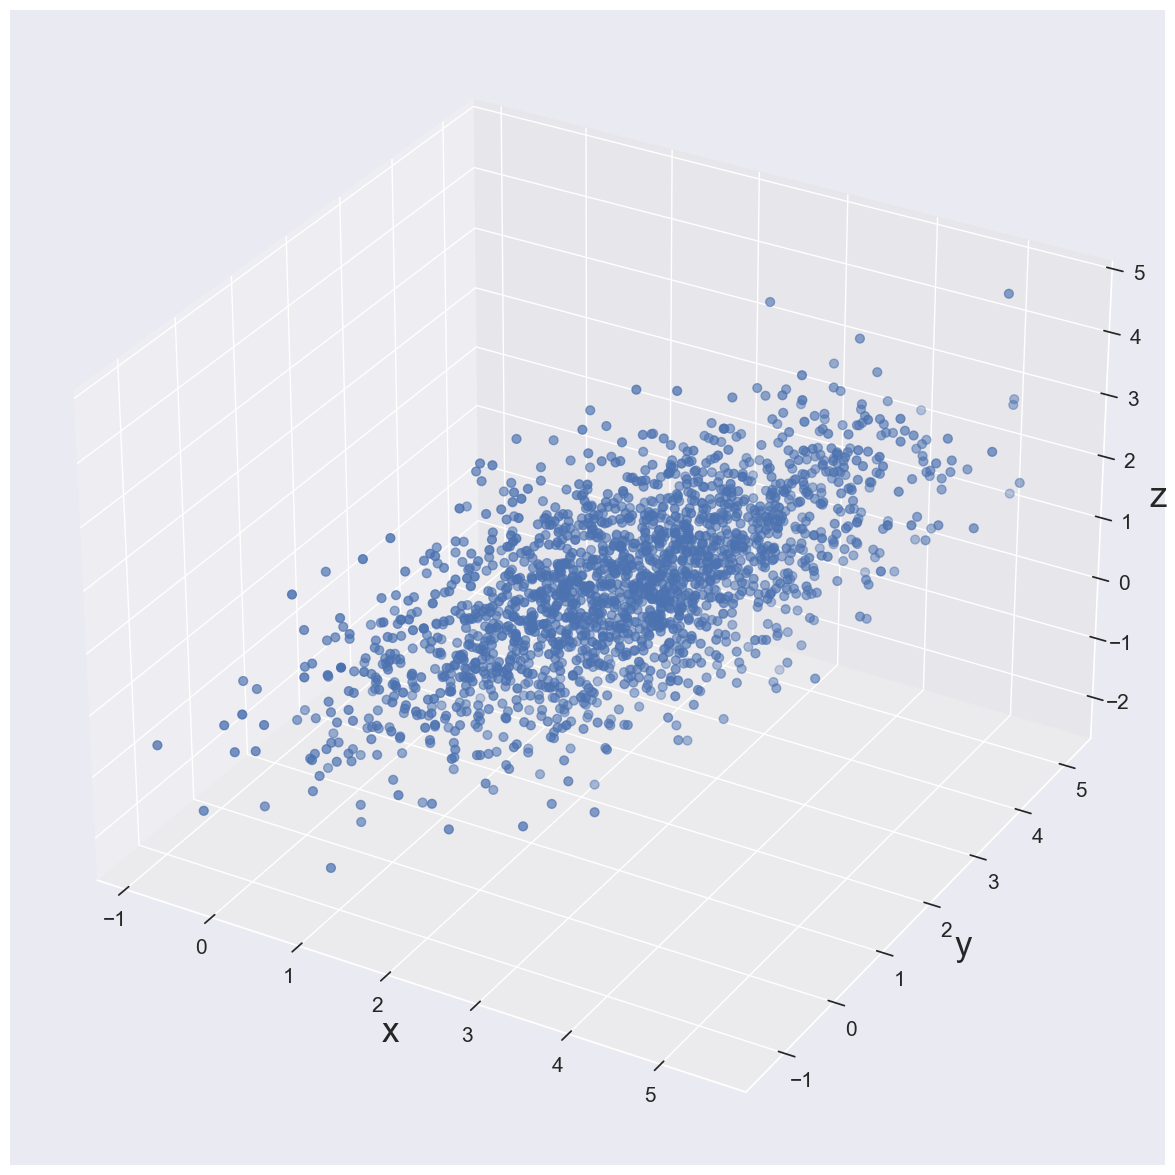

In [21]:
from mpl_toolkits.mplot3d import Axes3D
mu = np.array([2.5,2.0,1.0])
cov = np.array([[1.0,0.9,0.5],
                [0.9,1.0,0.7],
                [0.5,0.7,1.0]])
X = np.random.multivariate_normal(mu, cov, 2000)                                                                                                                                     
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],s=40)
ax.set_xlabel('x',fontsize=25)
ax.set_ylabel('y',fontsize=25)
ax.set_zlabel('z',fontsize=25)
plt.show()

# Joint Probability Distribution

In probability theory, the **joint probability distribution** of two random variables $X$ and $Y$ describes the likelihood of different combinations of values occurring together.

#### 1. Joint Cumulative Distribution Function (CDF)

The joint CDF is defined as:

$$
F_{X,Y}(x,y) = P(X \leq x, Y \leq y)
$$

This function gives the probability that $X$ and $Y$ are simultaneously less than or equal to given values.

#### 2. Joint Probability Mass Function (PMF) (for discrete random variables)

If $X$ and $Y$ are discrete, their joint probability mass function is:

$$
p_{X,Y}(x,y) = P(X = x, Y = y)
$$

This function specifies the probability of specific pairs $(X, Y)$.

#### 3. Joint Probability Density Function (PDF) (for continuous random variables)

For continuous variables, the joint PDF is given by:

$$
f_{X,Y}(x,y) = \frac{\partial^2 F_{X,Y}(x,y)}{\partial x \partial y}
$$

This function describes how probability is distributed over the values of $X$ and $Y$.


#### 4. The concept of **independence** is crucial in joint distributions:
- If $X$ and $Y$ are independent, their joint PDF factors as:

  $$
  f_{X,Y}(x,y) = f_X(x) f_Y(y)
  $$

  meaning that knowing $X$ provides no information about $Y$.


# Bivariate Gaussian example

$$f_{X,Y} = \frac{1}{2\pi\sqrt{\sigma_X^2\sigma_Y^2(1-\rho^2)}}\exp\left({-\frac{1}{2(1-\rho^2)}\left[\frac{(x-\mu_X)^2}{\sigma^2_X} + \frac{(y-\mu_Y)^2}{\sigma^2_Y} - \frac{2\rho(x-\mu_X)(y-\mu_Y)}{\sigma_X\sigma_Y}\right]}\right)$$

Where $\mu_X$ and $\mu_Y$ are the means or expectations of $X$ and $Y$, $\sigma^2_X$ and $\sigma^2_Y$ are the variances of $X$ and $Y$, and $\rho$ is the linear correlation (Pearson correlation) between $X$ and $Y$.

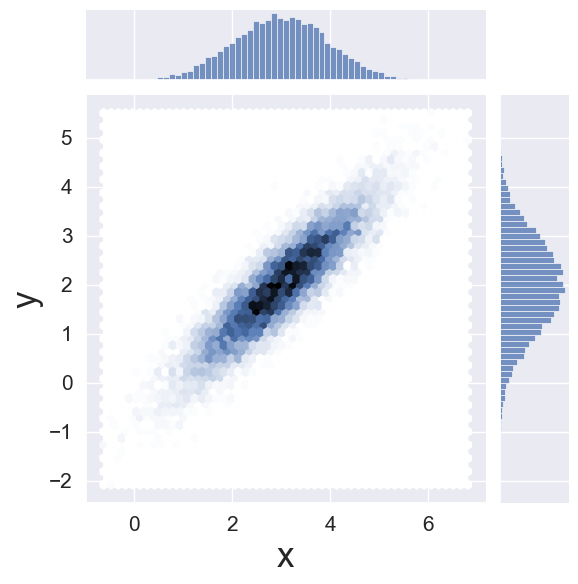

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
sns.set(rc={'axes.labelsize':25,
            'figure.figsize':(15.0, 15.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})
mu = np.array([3.0,2.0])
cov = np.array([[1.0,0.9],[0.9,1.0]])
X = np.random.multivariate_normal(mu,cov, 10000)
df = pd.DataFrame(data={'x':X[:,0],'y':X[:,1]})
sns.jointplot(x='x', y='y',data=df,kind='hex')
plt.show()

---
# Conditional Distribution

A **conditional distribution** describes the probability of a random variable given that another variable has taken a specific value.

Mathematically, the conditional probability of $X$ when $Y = y$ is:

$$
P(X = x | Y = y) = \frac{P(X = x, Y = y)}{P(Y = y)}
$$

This equation states that the probability of $X = x$ given $Y = y$ is obtained by normalizing the joint probability $P(X, Y)$ by the marginal probability $P(Y)$.

### **Key Insights**
- The conditional probability is **a different distribution for each value of $y$**.
- If $X$ and $Y$ are independent, then:

  $$
  P(X | Y) = P(X)
  $$

  meaning that knowledge of $Y$ does not affect the distribution of $X$.



### **Example: Finding Gold in a Mine**

Imagine a miner searching for gold in a vast region. The miner knows that **gold is rare**, but certain areas (denoted as $Y$) have **higher concentrations of gold deposits**.

#### Prior Probability (Baseline Belief)
Without any prior knowledge about the area, the probability of hitting gold is very low:

$$
P(X = \text{hit gold}) = 0.001
$$

This means that on average, the miner will find gold **once every 1000 digs** a 0.1% chance in a completely random search.

#### Updated Probability with New Information
Suppose the miner **receives a geological report** indicating that the current region is **rich in gold deposits** (denoted as $Y = \text{rich area}$). The probability of finding gold **increases significantly**:

$$
P(X = \text{hit gold} | Y = \text{rich area}) = 0.1
$$

This means that when the miner digs **in a rich gold area**, there is a **10%** chance of finding gold instead of the baseline **0.1%**.

#### What If the Area is Poor in Gold?
On the other hand, if the miner is in an area **not known for gold deposits** ($Y = \text{poor area}$), the probability remains very low:

$$
P(X = \text{hit gold} | Y = \text{poor area}) = 0.0005
$$

This means that in a poor area, the miner has an **even lower chance** of success.

#### This principle applies broadly:
- **Medical Testing:** Knowing a patient’s risk factors increases the accuracy of diagnosing diseases.
- **Spam Filtering:** A word appearing in an email can help predict whether it's spam.
- **Weather Forecasting:** Given that it’s cloudy, the probability of rain increases.

Conditional probabilities **update our beliefs based on new data**, making them powerful for decision-making.

---


# Conditional Probability Density Function (PDF)

When working with **continuous random variables**, we often want to describe how the probability of one variable ($X$) depends on another variable ($Y$). 

The **conditional probability density function (PDF)** tells us how likely different values of $X$ are, given that we already know $Y = y$. 

Mathematically, we define it as:

$$
f_{X | Y}(x | y) = \frac{f_{X,Y}(x, y)}{f_Y(y)}
$$

Although in many cases, you will see it written in a simpler form:

$$
f_{X|Y} = \frac{f_{X,Y}}{f_Y}
$$

where:
- $f_{X,Y}(x,y)$ is the **joint probability density function** of $X$ and $Y$. This function describes the probability of both variables occurring together.
- $f_Y(y)$ is the **marginal probability density function** of $Y$, which represents the probability of just $Y$ without considering $X$.


#### Breaking It Down
- The formula simply tells us that the **conditional probability** of $X$ given $Y = y$ is obtained by taking the **joint probability of $X$ and $Y$ together** and dividing it by the probability of $Y$ alone.
- The denominator, $f_Y(y)$, ensures that the total probability across all possible values of $X$ still adds up to 1.


### **Example: Environmental Science Example: River Pollution Levels**
Imagine we are studying the relationship between **pollutant concentration in a river ($X$)** and **the amount of rainfall in the region ($Y$)**.

- The **joint probability function** $f_{X,Y}(x, y)$ gives the probability of **both** a certain amount of rainfall and a certain level of pollution occurring together.
- The **marginal probability function** $f_Y(y)$ represents the probability of just **rainfall levels**, without considering pollution.
- The **conditional probability function** $f_{X | Y}(x | y)$ tells us:  
  > "Given that we already know the rainfall amount ($Y$), how likely is it that pollutant concentration ($X$) falls within a certain range?"

**Why does this matter?**
- **Higher rainfall can increase pollution levels** due to runoff from industrial areas, farms, or urban surfaces.
- **Low rainfall may also lead to high pollution concentrations** because less water is available to dilute the pollutants.

By studying $f_{X | Y}(x | y)$, environmental scientists can **predict pollution levels based on expected rainfall** and take preventive measures (e.g., setting pollution limits before heavy rain events).

---
# Chain Rule of Probability

The definition of **conditional probability** leads us to the **chain rule**, which allows us to express a joint probability distribution as a **product of conditional probabilities**.

For two variables, we start with:

$$
P(X,Y) = P(X,Y) \frac{P(Y)}{P(Y)} = P(X | Y) P(Y)
$$

which states that the joint probability of $X$ and $Y$ can be **decomposed** into the probability of $Y$ and the conditional probability of $X$ given $Y$.

### **Generalized Chain Rule**
For multiple random variables $X_1, X_2, ..., X_N$, we extend this to:

$$
P(X_1, X_2, ..., X_N) = \prod_{k=1}^{N} P(X_k | X_1, ..., X_{k-1})
$$

This means that we can **build the full probability distribution step by step**, by conditioning each variable on all previous ones.


### **Example: Air Quality and Weather Conditions**

Suppose we are interested in predicting **air quality ($X$) in a city** based on **weather conditions ($Y$) and pollutant emissions ($Z$)**.

Applying the **chain rule**, we can write:

$$
P(X, Y, Z) = P(X | Y, Z) P(Y | Z) P(Z)
$$

where:
- $P(Z)$ represents the probability of industrial pollution emissions.
- $P(Y | Z)$ represents the probability of specific weather conditions (e.g., **wind speed, humidity**) given pollution emissions.
- $P(X | Y, Z)$ represents the probability of air quality given **weather and emissions**.

---

# Marginalization (Discrete Random Variables)

Often, we are only interested in a **subset** of random variables. To remove unnecessary variables, we sum (or integrate) them out.

For discrete random variables:

$$
P(X = x) = \sum_{y} P(X = x, Y = y)
$$

$$
P(Y = y) = \sum_{x} P(X = x, Y = y)
$$

This allows us to **compute probabilities for individual variables** when only the joint distribution is given.

### **Example: Marginalization Example: Gold Mine Discovery**

Let's consider a **gold mining** scenario where we have probabilities of hitting gold ($X$) in a location classified as either **a gold mine ($Y$) or not ($Y$ is "not a gold mine")**.

| X/Y | X=no gold | X=hit gold | P(Y) |
| -- | --| -- | -- |
| **Y=gold mine** | 0.18  | 0.02 | **0.2** |
| **Y=not gold mine** | 0.79 | 0.01 | **0.8** |
| **P(X)**   | **0.97** | **0.03** |

#### Compute Marginal Probabilities
We find the probability of hitting gold **regardless of mine classification**:

$$
P(X = \text{hit gold}) = P(X = \text{hit gold} | Y = \text{gold mine}) P(Y = \text{gold mine}) + P(X = \text{hit gold} | Y = \text{not gold mine}) P(Y = \text{not gold mine})
$$

$$
= (0.02 \times 0.2) + (0.01 \times 0.8) = 0.004 + 0.008 = 0.03
$$

This tells us that, in general, **there is a 3% chance of hitting gold across all locations**.

Similarly, we compute $P(X = \text{no gold})$:

$$
P(X = \text{no gold}) = (0.18 \times 0.2) + (0.79 \times 0.8)
$$

$$
= 0.036 + 0.632 = 0.97
$$

which confirms that the total probability sums to **1**.


---
# Marginalization (Continuous Random Variables)

For continuous variables, marginalization is performed using integration:

$$
f_X(x) = \int_{-\infty}^{\infty} f_{X,Y}(x,y) dy
$$

$$
f_Y(y) = \int_{-\infty}^{\infty} f_{X,Y}(x,y) dx
$$

This allows us to obtain **individual probability distributions** from a **joint distribution**.

#### **Example: River Pollution and Rainfall**
Consider a river system where:
- $X$ = **Pollution level in the river** (measured in ppm),
- $Y$ = **Rainfall amount** (measured in mm).

If we have a **joint probability density function** $f_{X,Y}(x, y)$ that describes how rainfall and pollution are related, but we are only interested in the pollution levels ($X$), we marginalize over $Y$:

$$
f_X(x) = \int_{-\infty}^{\infty} f_{X,Y}(x,y) dy
$$

This **removes the rainfall variable** and gives us the overall probability distribution of pollution levels, **regardless of how much it rained**.

Similarly, if we are interested in the probability of rainfall regardless of pollution:

$$
f_Y(y) = \int_{-\infty}^{\infty} f_{X,Y}(x,y) dx
$$



---

# Summary:

### Marginal vs. conditional distribution

The **marginal probability** is the probability of a single event occurring, independent of other events.

The **conditional probability** is the probability that an event occurs given that another specific event has already occurred.

# Intuituion: 

### Marginal vs. conditional

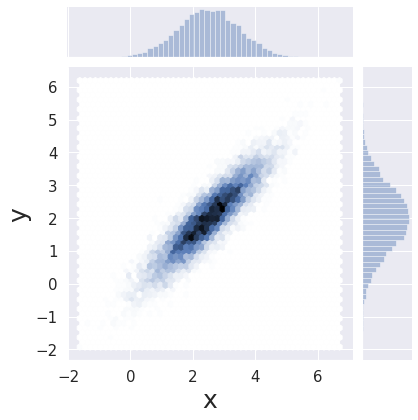

* What are the "side" plots? 
* What is the central heatmap?
* How would the conditional $f_{X|Y=0}$ compare to $f_{X}$?

---

# Going back to our 3 city example (again)

In [24]:
import netCDF4 as nc    
import datetime
sites = {'seattle':{'lat':47.6062,'lon':-122.3321},
         'paris':{'lat':48.8566,'lon':2.3522},
         'santiago':{'lat':-33.4489,'lon':-70.6693}}
file = '/Users/noemi/Downloads/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc'
fp = nc.Dataset(file)
lats = fp['lat'][:]
lons = fp['lon'][:]
times = fp['time']
for site in sites:
    lat = sites[site]['lat']
    lon = sites[site]['lon']
    if lon < 0:lon = 360 + lon
    sites[site]['ilat'] = int(np.argmin(np.abs(lats - lat)))
    sites[site]['ilon'] = int(np.argmin(np.abs(lons - lon)))
var = 't2m'
#Iterate through all the sites
for site in sites:
    #Extract the data for the given site
    ilat = sites[site]['ilat']
    ilon = sites[site]['ilon']
    sites[site][var] = fp[var][:,ilat,ilon]
#Convert the dates to a datetime array
dates = nc.num2date(times[:],units=times.units,calendar=times.calendar,only_use_cftime_datetimes=False)

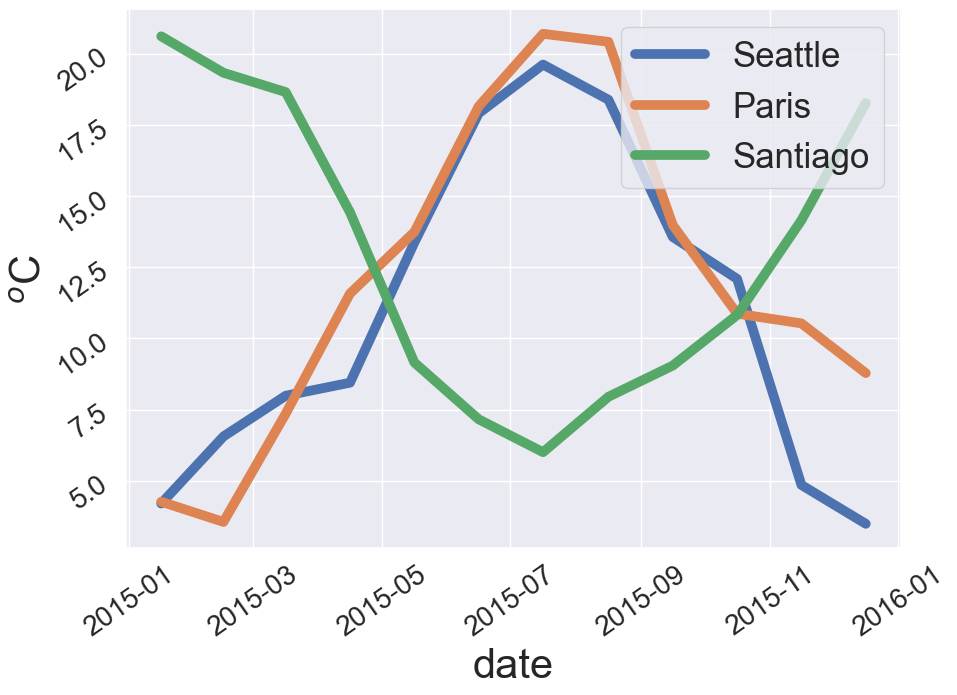

In [25]:
#Calculate the Boolean mask for dates within 2015
m = (dates >= datetime.datetime(2015,1,1)) & (dates <= datetime.datetime(2015,12,31))
#Assemble the subsetted dates array
dates_subset = dates[m]

plt.figure(figsize=(10,7))
plt.plot(dates_subset,sites['seattle']['t2m'][m],lw=7)
plt.plot(dates_subset,sites['paris']['t2m'][m],lw=7)
plt.plot(dates_subset,sites['santiago']['t2m'][m],lw=7)
plt.xticks(fontsize=20,rotation=35)
plt.yticks(fontsize=20,rotation=35)
plt.xlabel('date',fontsize=30)
plt.ylabel(r'$^o$C',fontsize=30)
plt.grid('on')
plt.legend(['Seattle','Paris','Santiago'],fontsize=25)
plt.show()

# Let's focus on Paris vs. Seattle

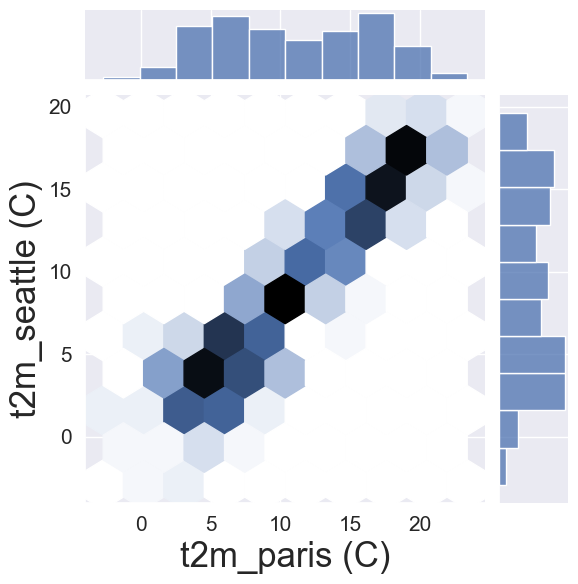

In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
sns.set(rc={'axes.labelsize':25,
            'figure.figsize':(15.0, 15.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})
df = pd.DataFrame(data={'t2m_paris (C)':sites['paris']['t2m'],'t2m_seattle (C)':sites['seattle']['t2m']})
sns.jointplot(x='t2m_paris (C)', y='t2m_seattle (C)',data=df,kind='hex')
plt.show()

# Let's try to fit a multivariate gaussian for this site

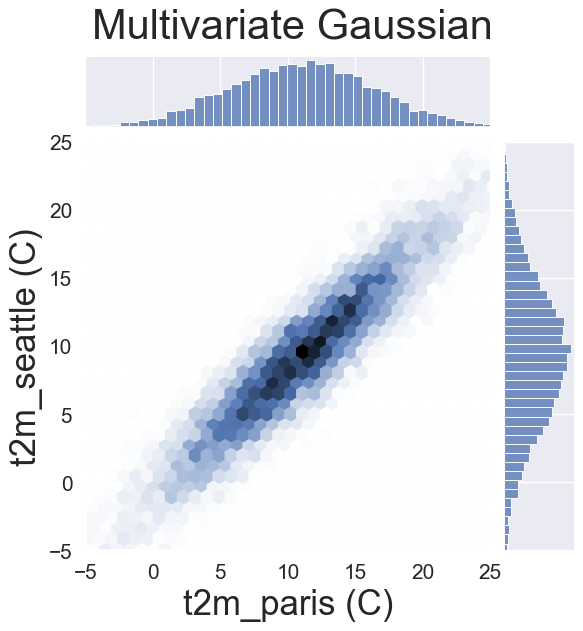

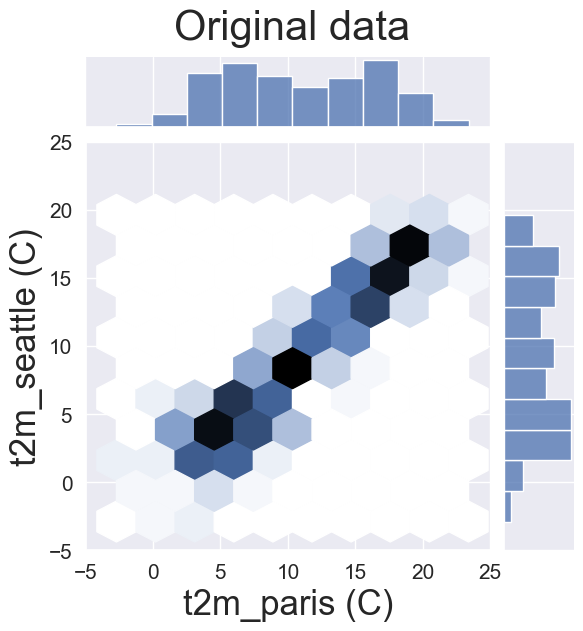

In [31]:
#Computer the vector of means
mu = [np.mean(sites['paris']['t2m']), np.mean(sites['seattle']['t2m'])]

#Compute the covariance matrix
cov = np.cov(sites['paris']['t2m'], sites['seattle']['t2m'])
sns.set_style('darkgrid')
sns.set(rc={'axes.labelsize':25,
            'figure.figsize':(15.0, 15.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})

#Draw 10,000 samples from the distribution
#Multivariate Gaussian
X = np.random.multivariate_normal(mu, cov, 10000)
df = pd.DataFrame(data={'t2m_paris (C)':X[:,0],'t2m_seattle (C)':X[:,1]})
sns.jointplot(x='t2m_paris (C)', y='t2m_seattle (C)',data=df,kind='hex',xlim=(-5,25),ylim=(-5,25))
plt.suptitle('Multivariate Gaussian',y=1.05,fontsize=30)

plt.show()
#Original
df = pd.DataFrame(data={'t2m_paris (C)':sites['paris']['t2m'],'t2m_seattle (C)':sites['seattle']['t2m']})
sns.jointplot(x='t2m_paris (C)', y='t2m_seattle (C)',data=df,kind='hex',xlim=(-5,25),ylim=(-5,25))
plt.suptitle('Original data',y=1.05,fontsize=30)
plt.show()

When we compare the marginals what do we notice?

The raw data joint distribution is influenced by both: 
* Marginal distributions (e.g., temperature distributions in Paris and Seattle may have different scales and shapes).
* Dependence structure (how the two variables co-vary).

# Copulas

Copulas provide a way to **model dependencies between random variables separately from their marginal distributions**. 

In simpler terms, they allow us to transform different datasets into a **common parametric distribution** (e.g., uniform or normal) and then **"couple"** them using their dependence structure.

#### **Why Use Copulas?**
1. **Separation of Marginals and Dependence Structure**  
   - Instead of working directly with raw data (e.g., temperatures in Seattle and Paris with different scales), we first transform each variable into ** a distribution using quantile transformation**.
   - By transforming to uniform quantiles, we can study how the two variables **depend on each other** without worrying about their original distributions or data scale.

2. **Copulas Capture Dependency, Not Individual Behavior**  
   - Many traditional correlation models (like Pearson correlation) **assume normality** and struggle with nonlinear dependencies.
   - Copulas allow us to analyze **complex dependencies**, including cases where correlation **changes in extreme conditions** (e.g., during heatwaves or financial crashes).


### Transformations (Quantile mapping)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Histogram_matching.PNG/440px-Histogram_matching.PNG" width="700">



## Example 1 (Original to Uniform)

In [26]:
import sklearn.preprocessing

seattle_t2m_uniform = sklearn.preprocessing.quantile_transform(sites['seattle']['t2m'][:,np.newaxis],
                                                               output_distribution='uniform',
                                                               random_state=0,
                                                               copy=True,n_quantiles=sites['seattle']['t2m'].size)

paris_t2m_uniform = sklearn.preprocessing.quantile_transform(sites['paris']['t2m'][:,np.newaxis],
                                                             output_distribution='uniform',
                                                             random_state=0,
                                                             copy=True,n_quantiles=sites['paris']['t2m'].size)

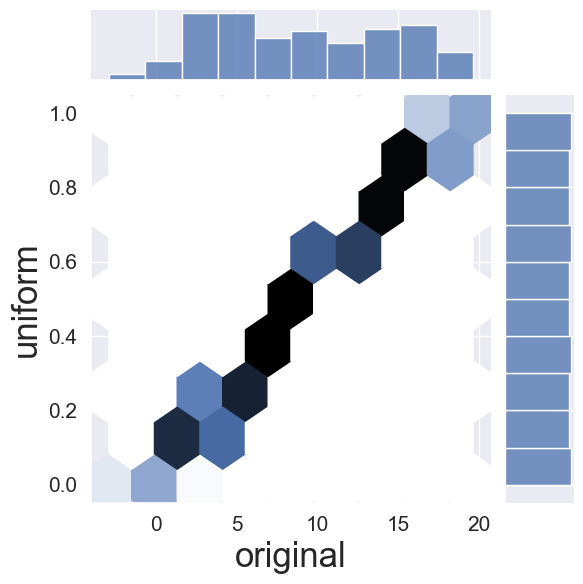

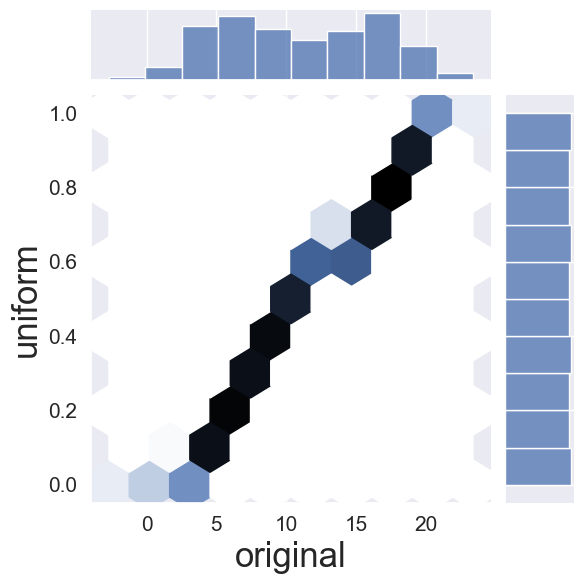

In [32]:
df = pd.DataFrame(data={'original':sites['seattle']['t2m'],'uniform':seattle_t2m_uniform[:,0]})
sns.jointplot(x='original', y='uniform',data=df,kind='hex')
plt.show()

df = pd.DataFrame(data={'original':sites['paris']['t2m'],'uniform':paris_t2m_uniform[:,0]})
sns.jointplot(x='original', y='uniform',data=df,kind='hex')
plt.show()

# Comparing uniforms instead of original data

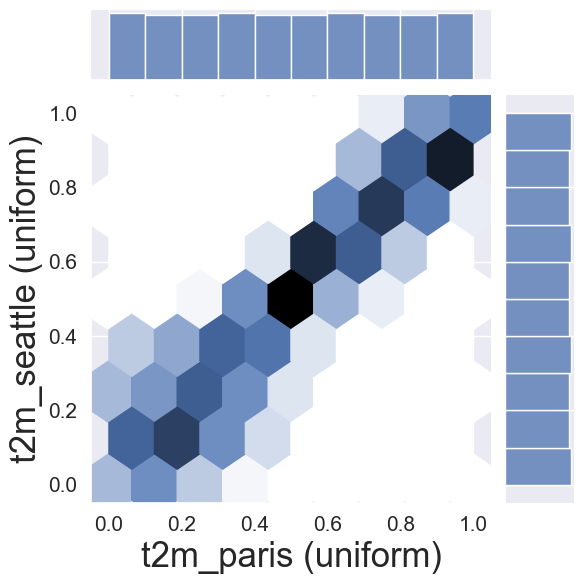

In [17]:
df = pd.DataFrame(data={'t2m_paris (uniform)':paris_t2m_uniform[:,0],'t2m_seattle (uniform)':seattle_t2m_uniform[:,0]})
sns.jointplot(x='t2m_paris (uniform)', y='t2m_seattle (uniform)',data=df,kind='hex')
plt.show()

# We could also transform all the data to standard gaussian

In [18]:
seattle_t2m_gaussian = sklearn.preprocessing.quantile_transform(sites['seattle']['t2m'][:,np.newaxis],
                                                               output_distribution='normal',
                                                               random_state=0,
                                                               copy=True,n_quantiles=sites['seattle']['t2m'].size)
paris_t2m_gaussian = sklearn.preprocessing.quantile_transform(sites['paris']['t2m'][:,np.newaxis],
                                                             output_distribution='normal',
                                                             random_state=0,
                                                             copy=True,n_quantiles=sites['paris']['t2m'].size)

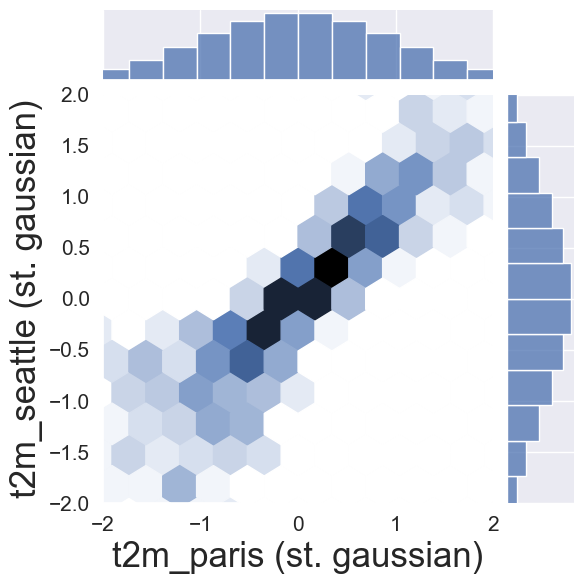

In [19]:
df = pd.DataFrame(data={'t2m_paris (st. gaussian)':paris_t2m_gaussian[:,0],'t2m_seattle (st. gaussian)':seattle_t2m_gaussian[:,0]})
sns.jointplot(x='t2m_paris (st. gaussian)', y='t2m_seattle (st. gaussian)',data=df,kind='hex',xlim=(-2,2),ylim=(-2,2))
plt.show()


### **Many Possibilities**

<img src="https://bochang.me/blog/posts/copula/normal_plots.png" width="700">

### **Real-World Applications of Copulas**
- **Finance**: Used in risk modeling to assess the probability of multiple financial assets crashing simultaneously.
- **Climate Science**: Helps model extreme weather events by understanding how different climate variables interact.
- **Engineering**: Used in reliability analysis of structures where multiple components may fail together.

**Be cautious when using models that rely on historical correlations**—the extremes are often where models fail the most!

Copulas played a key role in the **2008 financial crisis** because they were used to model default risk in mortgage-backed securities. The issue was that they **underestimated tail dependencies**—meaning they failed to predict that during extreme conditions (like a housing crash), defaults would become highly correlated. This led to a **systemic underestimation of risk**, contributing to the collapse of financial markets.  



---
# Bayes' Rule

Bayes' Rule provides a mathematical framework for **updating beliefs** about an uncertain event when new evidence is introduced. It is the foundation of **Bayesian inference**, which continuously refines probability estimates as more data becomes available.

The formula is:

$$
P(X|Y) = \frac{P(Y|X)P(X)}{P(Y)}
$$

where $P(Y) > 0$, ensuring that the denominator is valid.

Explanation of Terms:
- **$P(X|Y)$  Posterior probability**: The updated probability of $ X $ after observing $ Y$.  
- **$P(Y|X)$  Likelihood function**: The probability of observing $ Y $ given that $X$ is true.  
- **$P(X)$ Prior probability**: The initial belief about $X$ before considering $Y$.  
- **$P(Y)$ Evidence or Normalizing Constant**: The total probability of $Y$, ensuring the result is a valid probability distribution.

### **Bayes' Rule in Practice: Water-Well Yield Example**

Example from Schuenemeyer and Drew, 2010:

We want to determine the probability that a water well will have **high yield** given that it is drilled in a specific **rock type (Ygt)**.

Using Bayes' Rule:

$$
P(X=\text{high yield well}| Y=\text{rock type Ygt}) = \frac{P(Y=\text{rock type Ygt}|X=\text{high yield well}) P(X=\text{high yield well})}{P(Y=\text{rock type Ygt})}
$$

Given Information:
1. **Prior probability** of a well being high yield in the entire domain:
   $$
   P(X=\text{high yield well}) = 0.06
   $$

2. **Geologic data** tells us that 20% of the domain consists of rock type **Ygt**:
   $$
   P(Y=\text{rock type Ygt}) = 0.2
   $$

3. **Empirical well drilling data** estimates that 50% of **high yield wells** are in rock type **Ygt**:
   $$
   P(Y=\text{rock type Ygt}|X=\text{high yield well}) = 0.5
   $$

### Applying Bayes' Rule:
Substituting the values:

$$
P(X=\text{high yield well}| Y=\text{rock type Ygt}) = \frac{(0.5) \times (0.06)}{0.2} = \frac{0.03}{0.2} = 0.15
$$

### **Interpretation:**
- Given that we are drilling in **rock type Ygt**, the probability of finding a **high yield well** is **15%**.
- This is **higher than the prior probability (6%)**, indicating that rock type **Ygt is a more favorable location** for high-yield wells.

# Seems simple, right?

The reality is that Bayesian statistics typically involves using probability distributions rather than point probabilities as in the previous example.

This makes the problem more challenging (yet interesting).

# Using distributions instead...

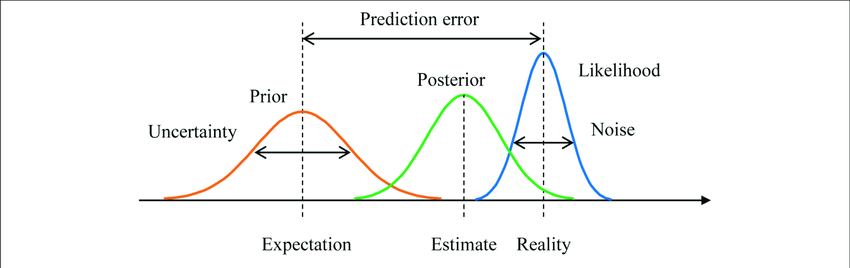

Source: https://www.researchgate.net/profile/Hideyoshi-Yanagisawa/publication/330577376/figure/fig1/AS:718458304086017@1548305216392/Example-of-Bayesian-inference-with-a-prior-distribution-a-posterior-distribution-and.png

# Bayesian statistics

Overaching goal of Bayesian statistics is to represent prior uncertainty about model parameters with a probability distribution and to update this prior uncertainty with current data to produce a posterior probability distribution for the parameter that contains less uncertainty.

$$f(\theta|\text{data}) = \frac{f(\text{data}|\theta) f(\theta)}{f(\text{data})}$$


* $f(\theta)$: Prior distribution of the model parameters
* $f(\theta|\text{data})$: Posterior distribution of the model parameters
* $f(\text{data}|\theta)$: Likelihood function
* $f(\text{data})$: Marginal distribution

A simpler way to think of this:

$$\text{Posterior} \propto \text{Likelihood} \times \text{Prior}$$ 

# Bayesian Statistics: Updating Beliefs with Data

Bayesian statistics **extends Bayes' Rule** to model **uncertainty in parameters**, updating prior beliefs as more data becomes available.

The Bayesian inference formula:

$$
f(\theta|\text{data}) = \frac{f(\text{data}|\theta) f(\theta)}{f(\text{data})}
$$

where:
- $f(\theta)$ Prior Distribution: Represents initial knowledge about model parameters.
- $f(\theta|\text{data})$ Posterior Distribution: Updated belief about the parameters after considering the data.
- $f(\text{data}|\theta)$ Likelihood Function: Probability of the observed data given model parameters.
- $f(\text{data})$ Evidence or Marginal Likelihood: Ensures proper normalization.

Simplified Bayesian Formula:
$$
\text{Posterior} \propto \text{Likelihood} \times \text{Prior}
$$

This means:
- Prior knowledge is updated using the likelihood from new data collected.
- The posterior distribution contains more refined information than the prior.


# Priors matter...

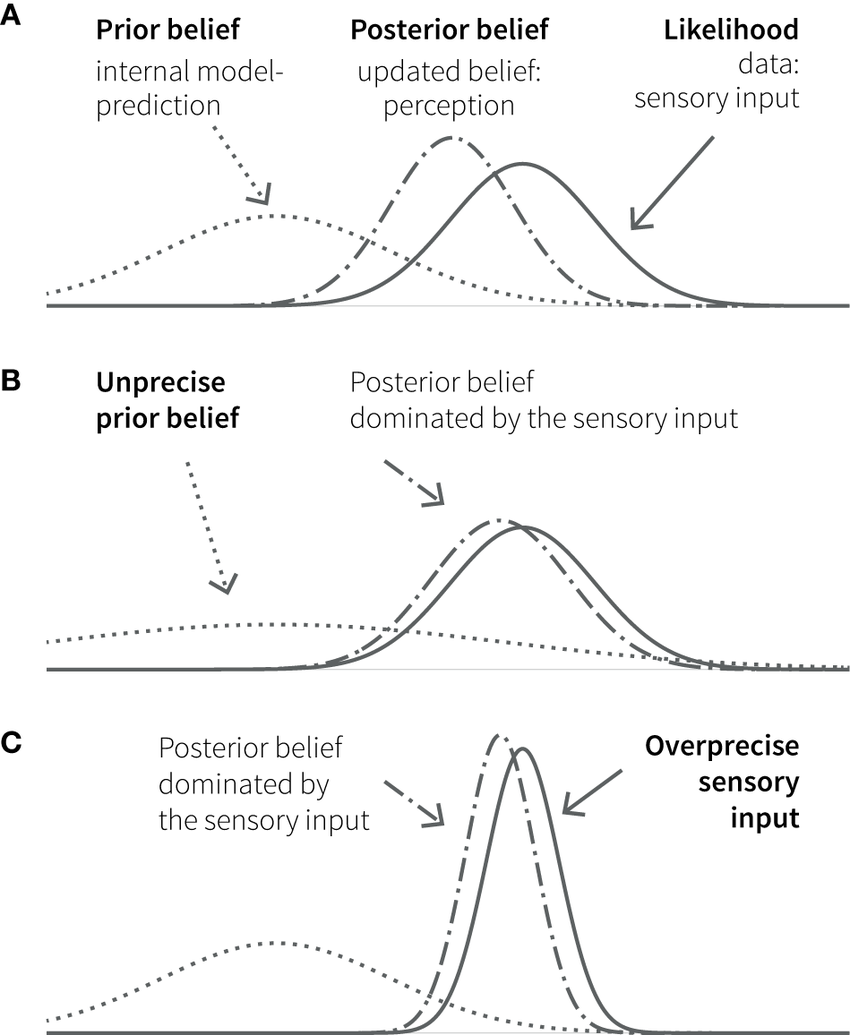

Source: https://www.researchgate.net/publication/304033579/figure/fig2/AS:391240878182466@1470290502662/Principles-of-Bayesian-inference-A-A-prior-belief-knowledge-expectation-or.png

We will come back to Bayesian inference (at least from a high level perspective) when we discuss using Gaussian mixture models for clustering spatial data. 

The next week we are switching gears and will focus on map projections. 